In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from cerebellum_functionnal import *
import pprint as pp

In [2]:
from utils import *

In [3]:
def mean_weight(coupling,nb_connect,size_a,size_b):
    return coupling*(1/((nb_connect*size_a)/size_b))

def minimum_connect(nb_connect,size_a,size_b):
    return int(((nb_connect*size_a)/size_b)/2)

In [4]:
input_size=100
DCN_size=100
IO_size=100
GC_size=100
PC_size=1000
coupling_GC_PC=1
coupling_PC_DCN=5
coupling_DCN_IO=5
coupling_IO_PC=3
coupling_PT_GC=1
coupling_PT_DCN=1
coupling_PT_IO=1

#Size of the microzones as a fraction of their respective neuronal population
# as an exemple if our PC pop is composed of 1000 neurons, our DCN pop of 100 neurons
# and our IO pop of 100 neurons, a microzone of 0.01 will induce that 10 neurons of 
# the PC pop will communicate with 1 neuron of the DCN pop which will communicate with 1 
# neuron of the IO pop which will communicate with the 10 starting neurons from the PC pop.
# WARNING : multipling each population of neurons belonging to the microzone pathway by 
# the chosen microzone_size should give a round number (int) !!!
microzone_size=0.01

# The number of connection a neuron from the source population will make with the target population.
# Random connectivity without microzoning helpful to mix signal from multiple sources from the inputs (pontine neurones)
# to the primary targets.
nb_connect_GC_PC=100
nb_connect_PT_GC=10
nb_connect_PT_DCN=10
nb_connect_PT_IO=10
# The minimum of connection a neuron from the target population should get from the source population
minimum_connect_GC_PC = minimum_connect(nb_connect_GC_PC,GC_size,PC_size)
minimum_connect_PT_GC = minimum_connect(nb_connect_PT_GC,input_size,GC_size)
minimum_connect_PT_DCN = minimum_connect(nb_connect_PT_DCN,input_size,DCN_size)
minimum_connect_PT_IO = minimum_connect(nb_connect_PT_IO,input_size,IO_size)


cere_info = dict()
cere_info["microzone_size"]=microzone_size
cere_info["neuron_pop"]=dict()
cere_info["neuron_pop"]["DCN"]=dict()
cere_info["neuron_pop"]["DCN"]["size"]=DCN_size

cere_info["neuron_pop"]["IO"]=dict()
cere_info["neuron_pop"]["IO"]["size"]=IO_size

cere_info["neuron_pop"]["GC"]=dict()
cere_info["neuron_pop"]["GC"]["size"]=GC_size

cere_info["neuron_pop"]["PC"]=dict()
cere_info["neuron_pop"]["PC"]["size"]=PC_size

cere_info["neuron_pop"]["PT"]=dict()
cere_info["neuron_pop"]["PT"]["size"]=input_size

# create an activity vector variable for each region of the cerebellum (any local variable is considered a vector
# and a tuple is used to store the shape)
for key in cere_info["neuron_pop"]:
    cere_info["neuron_pop"][key]["local_variables"]=dict()
    cere_info["neuron_pop"][key]["local_variables"]["activity"] = (cere_info["neuron_pop"][key]["size"],1)
    pass

# Purkinje cells are a little bit special as we add a local variable called calcium to deal with synaptic plasticity

cere_info["neuron_pop"]["PC"]["local_variables"]["calcium"] = (cere_info["neuron_pop"]["PC"]["size"],1)

""" Connection from the microcircuit """

cere_info["synapse_pop"]=dict()
cere_info["synapse_pop"]["PC_DCN"]=dict()
cere_info["synapse_pop"]["PC_DCN"]["i_o"]=("PC","DCN")
cere_info["synapse_pop"]["PC_DCN"]["nb_connect"]=None
cere_info["synapse_pop"]["PC_DCN"]["type"]="inhibitory"
cere_info["synapse_pop"]["PC_DCN"]["minimum_connect"]=None
cere_info["synapse_pop"]["PC_DCN"]["plastic"] = False

cere_info["synapse_pop"]["DCN_IO"]=dict()
cere_info["synapse_pop"]["DCN_IO"]["i_o"]=("DCN","IO")
cere_info["synapse_pop"]["DCN_IO"]["nb_connect"]=None
cere_info["synapse_pop"]["DCN_IO"]["type"]="inhibitory"
cere_info["synapse_pop"]["DCN_IO"]["minimum_connect"]=None
cere_info["synapse_pop"]["DCN_IO"]["plastic"] = False

cere_info["synapse_pop"]["IO_PC"]=dict()
cere_info["synapse_pop"]["IO_PC"]["i_o"]=("IO","PC")
cere_info["synapse_pop"]["IO_PC"]["nb_connect"]=None
cere_info["synapse_pop"]["IO_PC"]["type"]="Undefined"
cere_info["synapse_pop"]["IO_PC"]["minimum_connect"]=None
cere_info["synapse_pop"]["IO_PC"]["plastic"] = False

""" Connection outside the microcircuit """

cere_info["synapse_pop"]["GC_PC"]=dict()
cere_info["synapse_pop"]["GC_PC"]["i_o"]=("GC","PC")
cere_info["synapse_pop"]["GC_PC"]["type"]="excitatory"
cere_info["synapse_pop"]["GC_PC"]["nb_connect"]=nb_connect_GC_PC
cere_info["synapse_pop"]["GC_PC"]["minimum_connect"]=minimum_connect_GC_PC
cere_info["synapse_pop"]["GC_PC"]["plastic"] = True

# cere_info["synapse_pop"]["PT_GC"]=dict()
# cere_info["synapse_pop"]["PT_GC"]["i_o"]=("PT","GC")
# cere_info["synapse_pop"]["PT_GC"]["type"]="excitatory"  #PT->GC DISABLED !
# cere_info["synapse_pop"]["PT_GC"]["nb_connect"]=nb_connect_PT_GC
# cere_info["synapse_pop"]["PT_GC"]["minimum_connect"]= minimum_connect_PT_GC
# cere_info["synapse_pop"]["PT_GC"]["plastic"] = False

cere_info["synapse_pop"]["PT_DCN"]=dict()
cere_info["synapse_pop"]["PT_DCN"]["i_o"]=("PT","DCN")
cere_info["synapse_pop"]["PT_DCN"]["type"]="excitatory"
cere_info["synapse_pop"]["PT_DCN"]["nb_connect"]=nb_connect_PT_DCN
cere_info["synapse_pop"]["PT_DCN"]["minimum_connect"]= minimum_connect_PT_DCN
cere_info["synapse_pop"]["PT_DCN"]["plastic"] = False

# cere_info["synapse_pop"]["PT_IO"]=dict()
# cere_info["synapse_pop"]["PT_IO"]["i_o"]=("PT","IO")
# cere_info["synapse_pop"]["PT_IO"]["type"]="excitatory" #PT->IO DISABLED !
# cere_info["synapse_pop"]["PT_IO"]["nb_connect"]=nb_connect_PT_IO
# cere_info["synapse_pop"]["PT_IO"]["minimum_connect"]= minimum_connect_PT_IO
# cere_info["synapse_pop"]["PT_IO"]["plastic"] = False


nb_converge_PC_DCN=microzone_size*PC_size
nb_converge_DCN_IO=microzone_size*DCN_size
nb_converge_IO_PC=microzone_size*IO_size

""" Warning : as the connectivity pattern of synapses in the microzone pathway and synapses outside of the microzone pathway
# is different, the mean weight is derived from the coupling using different methods"""
#In the microzone pathway
cere_info["synapse_pop"]["PC_DCN"]["mean_weight"]=coupling_PC_DCN/nb_converge_PC_DCN
cere_info["synapse_pop"]["DCN_IO"]["mean_weight"]=coupling_DCN_IO/nb_converge_DCN_IO
cere_info["synapse_pop"]["IO_PC"]["mean_weight"]=coupling_IO_PC/nb_converge_IO_PC

#Outside the microzone pathway
cere_info["synapse_pop"]["GC_PC"]["mean_weight"]=mean_weight(coupling_GC_PC,nb_connect_GC_PC,GC_size,PC_size) 
#cere_info["synapse_pop"]["PT_GC"]["mean_weight"]=mean_weight(coupling_PT_GC,nb_connect_PT_GC,input_size,GC_size) 
cere_info["synapse_pop"]["PT_DCN"]["mean_weight"]=mean_weight(coupling_PT_DCN,nb_connect_PT_DCN,input_size,DCN_size) 
#cere_info["synapse_pop"]["PT_IO"]["mean_weight"]=mean_weight(coupling,nb_connect_PT_IO,input_size,IO_size) 


In [5]:
def connected_to(ind_source,source,target):
    return set(np.where(cere_state["synapse_pop"][source+"_"+target]["local_variables"]["connectivity"][ind_source]==1)[0])
    
def connected_to_pop(ind_sources,source,target):
    connected=set()
    for ind_source in ind_sources:
        connected= connected.union(connected_to(ind_source,source,target))
    return connected

In [6]:
nb_time_steps=6000

In [7]:
"Generate dict input :"

dict_input=dict()
for neuron_pop in cere_info["neuron_pop"]:
    dict_input[neuron_pop]=dict()
    for local_variable in cere_info["neuron_pop"][neuron_pop]["local_variables"]:
        dict_input[neuron_pop][local_variable]= np.zeros((nb_time_steps,cere_info["neuron_pop"][neuron_pop]["size"]))

# stimulated_PT=[0,1,2,3,4,5]
# stimulated_GC=[0,1,2,3,4,5]
# stimulated_IO=[0,1,2,3,4,5]
# dict_input["PT"]["activity"][:,stimulated_PT] =1 
# dict_input["GC"]["activity"][:,stimulated_GC] =1 

stimulated_IO=range(cere_info["neuron_pop"]["IO"]["size"])
stimulated_DCN=range(cere_info["neuron_pop"]["DCN"]["size"])
stimulated_GC=range(cere_info["neuron_pop"]["GC"]["size"])
dict_input["IO"]["activity"][:,stimulated_IO] =1 
dict_input["DCN"]["activity"][:,stimulated_DCN] =1
dict_input["GC"]["activity"][:,stimulated_GC] =1

In [8]:
t = 0 
activity_t = dict()
for cere_state in whole_model_sim(cere_info,dict_input):
    if t==0:
        for neuron_pop in cere_state["neuron_pop"]:
            activity_t[neuron_pop]=np.zeros((nb_time_steps,cere_info["neuron_pop"][neuron_pop]["size"]))
        activity_t["GC_PC"]=np.zeros((nb_time_steps,cere_info["neuron_pop"]["GC"]["size"],cere_info["neuron_pop"]["PC"]["size"]))
    else :
        for neuron_pop in cere_state["neuron_pop"]:
            activity_t[neuron_pop][t,:]=cere_state["neuron_pop"][neuron_pop]["local_variables"]["activity"]
        activity_t["GC_PC"][t,:]=cere_state["synapse_pop"]["GC_PC"]["local_variables"]["weight"]
    if t==nb_time_steps-1:
        cere_state_final=cere_state
        break
    t+=1

In [9]:
#plt.plot([np.mean(i.flatten()) for i in activity_t["GC_PC"]])#we need to remove all zeros
#plt.plot([np.mean(t) for t in activity_t["PC"]])
#plt.hist(activity_t["DCN"][-1]);

In [10]:
connected_pc = np.where(cere_state["synapse_pop"]["GC_PC"]["local_variables"]["connectivity"].flatten()==1)[0]

In [11]:
# connected_io_pc_zero = connected_to_pop(stimulated_IO,"IO","PC")
# connected_gc_pc_zero = connected_to_pop(stimulated_GC,"GC","PC")
# connected_pt_dcn_zero = connected_to_pop(stimulated_PT,"PT","DCN")
# connected_pc_dcn_pop = connected_to_pop(connected_gc_pc_zero,"PC","DCN")
# over_pc = connected_gc_pc_zero.intersection(connected_io_pc_zero)
# connected_over_pc_dcn_pop = connected_to_pop(over_pc,"PC","DCN")
# reach_io = connected_to_pop(connected_over_pc_dcn_pop,"DCN","IO")

# np_over_pc= np.array(list(over_pc))
# connected_over_pc = np.where(cere_state["synapse_pop"]["GC_PC"]["local_variables"]["connectivity"][:,np_over_pc].flatten()==1)[0]
# connected_pc = np.where(cere_state["synapse_pop"]["GC_PC"]["local_variables"]["connectivity"].flatten()==1)[0]

# connected_in_time_mean = list()
# connected_in_time = list()

# for t in range(1,nb_time_steps):
#     connected_in_time_mean.append(np.mean(activity_t["GC_PC"][t][:,np_over_pc].flatten()[connected_over_pc]))
#     connected_in_time.append(activity_t["GC_PC"][t][:,np_over_pc].flatten()[connected_over_pc])

# plt.plot(connected_in_time_mean) # All weights goes to zero

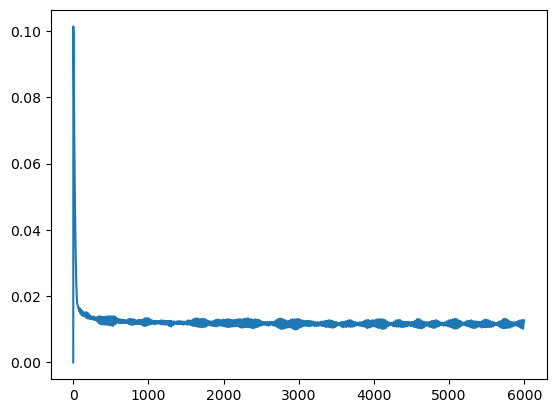

In [12]:
plt.plot([np.mean(i.flatten()[connected_pc]) for i in activity_t["GC_PC"]]) #not representative

(array([9.999e+03, 5.200e+01, 3.700e+01, 2.300e+01, 1.200e+01, 5.000e+00,
        0.000e+00, 3.000e+00, 1.000e+00, 1.000e+00]),
 array([0.        , 0.03924508, 0.07849017, 0.11773525, 0.15698033,
        0.19622541, 0.2354705 , 0.27471558, 0.31396066, 0.35320575,
        0.39245083]),
 <BarContainer object of 10 artists>)

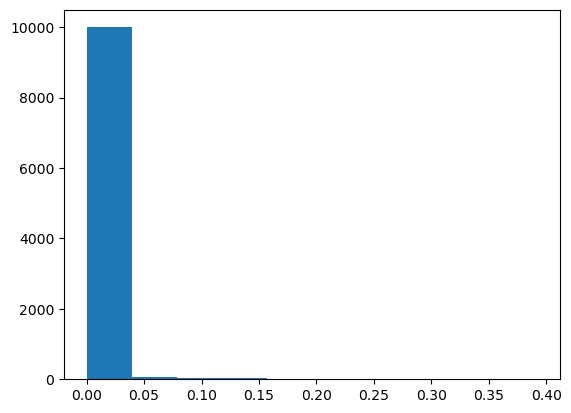

In [13]:
plt.hist((activity_t["GC_PC"][-1].flatten())[connected_pc])

<IPython.core.display.Javascript object>


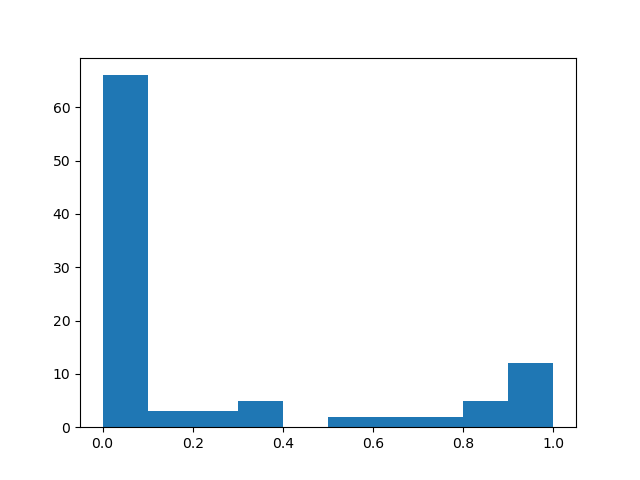

In [16]:
plt.hist(activity_t["IO"][-1]);

In [17]:
%matplotlib notebook

In [18]:
data_IO = activity_t["IO"]
HIST_BINS = np.linspace(0, 1.0, 10)

In [24]:
len(activity_t["IO"])

6000

In [19]:
def prepare_animation(bar_container):

    def animate(frame_number):
        # simulate new data coming in
        data = activity_t["IO"][frame_number]
        n, _ = np.histogram(data, HIST_BINS)
        for count, rect in zip(n, bar_container.patches):
            rect.set_height(count)
        return bar_container.patches
    return animate

<IPython.core.display.Javascript object>


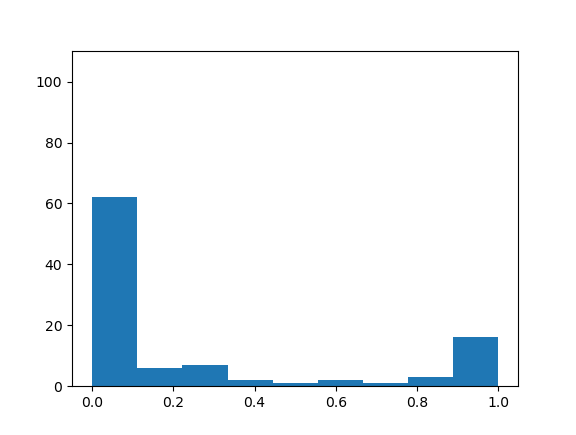

In [25]:
fig, ax = plt.subplots()
_, _, bar_container = ax.hist(data_IO[0], HIST_BINS)
ax.set_ylim(top=110)  # set safe limit to ensure that all data is visible.

anim = animation.FuncAnimation(fig, prepare_animation(bar_container), 6000,
                              repeat=False, blit = True)
plt.show()

In [84]:
animation.FuncAnimation?

Init signature:
animation.FuncAnimation(
    fig,
    func,
    frames=None,
    init_func=None,
    fargs=None,
    save_count=None,
    *,
    cache_frame_data=True,
    **kwargs,
)
Docstring:     
Makes an animation by repeatedly calling a function *func*.

.. note::

    You must store the created Animation in a variable that lives as long
    as the animation should run. Otherwise, the Animation object will be
    garbage-collected and the animation stops.

Parameters
----------
fig : `~matplotlib.figure.Figure`
    The figure object used to get needed events, such as draw or resize.

func : callable
    The function to call at each frame.  The first argument will
    be the next value in *frames*.   Any additional positional
    arguments can be supplied via the *fargs* parameter.

    The required signature is::

        def func(frame, *fargs) -> iterable_of_artists

    If ``blit == True``, *func* must return an iterable of all artists
    that were modified or created. This i

In [ ]:
# reach_io_len_mean=0
# sample = 100
# for it in range(sample):
#     t = 0 
#     activity_t = dict()
#     for cere_state in whole_model_sim(cere_info,dict_input):
#         if t==0:
#             for neuron_pop in cere_state["neuron_pop"]:
#                 activity_t[neuron_pop]=np.zeros((nb_time_steps,cere_info["neuron_pop"][neuron_pop]["size"]))
#             activity_t["GC_PC"]=np.zeros((nb_time_steps,cere_info["neuron_pop"]["GC"]["size"],cere_info["neuron_pop"]["PC"]["size"]))
#         else :
#             for neuron_pop in cere_state["neuron_pop"]:
#                 activity_t[neuron_pop][t,:]=cere_state["neuron_pop"][neuron_pop]["local_variables"]["activity"]
#             activity_t["GC_PC"][t,:]=cere_state["synapse_pop"]["GC_PC"]["local_variables"]["weight"]
#         if t==nb_time_steps-1:
#             cere_state_final=cere_state
#             break
#         t+=1

#     connected_io_pc_zero = connected_to_pop(stimulated_IO,"IO","PC")
#     connected_gc_pc_zero = connected_to_pop(stimulated_GC,"GC","PC")
#     connected_pt_dcn_zero = connected_to_pop(stimulated_PT,"PT","DCN")
#     connected_pc_dcn_pop = connected_to_pop(connected_gc_pc_zero,"PC","DCN")
#     over_pc = connected_gc_pc_zero.intersection(connected_io_pc_zero)
#     #over_dcn = connected_pc_dcn_pop.intersection(connected_pt_dcn_zero)
#     connected_over_pc_dcn_pop = connected_to_pop(over_pc,"PC","DCN")
#     reach_io = connected_to_pop(connected_over_pc_dcn_pop,"DCN","IO")
#     reach_io_len_mean+=len(reach_io)